In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/.DS_Store
/kaggle/input/playground-series-s4e10/test.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/sample_submission.csv


In [2]:
loans = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
loans.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
np.round(loans.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.00,16929.50,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.55,6.03,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.17,37931.11,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.70,3.96,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.56,5563.81,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.68,3.03,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.16,0.09,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.81,4.03,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.14,0.35,0.00,0.00,0.00,0.00,1.00


In [4]:
loans.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
loans.select_dtypes(["object", "category"])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N
58643,RENT,EDUCATION,A,N


In [6]:
for col in loans.columns:
    if loans[col].dtype in ["object", "category"]:
        loans[col], _ = loans[col].factorize()

In [7]:
loans.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,0,0.0,0,0,6000,11.49,0.17,0,14,0
1,1,22,56000,1,6.0,1,1,4000,13.35,0.07,0,2,0
2,2,29,28800,1,8.0,2,2,6000,8.90,0.21,0,10,0
3,3,30,70000,0,14.0,3,0,12000,11.11,0.17,0,5,0
4,4,22,60000,0,2.0,1,2,6000,6.92,0.10,0,3,0
5,5,27,45000,0,2.0,3,2,9000,8.94,0.20,0,5,0
6,6,25,45000,2,9.0,0,2,12000,6.54,0.27,0,3,0
7,7,21,20000,0,0.0,2,1,2500,13.49,0.13,1,3,0
8,8,37,69600,0,11.0,0,3,5000,14.84,0.07,1,11,0
9,9,35,110000,2,0.0,4,1,15000,12.98,0.14,1,6,0


In [8]:
loans[["loan_status"]].value_counts(), loans.shape

(loan_status
 0              50295
 1               8350
 Name: count, dtype: int64,
 (58645, 13))

<Axes: xlabel='loan_status', ylabel='count'>

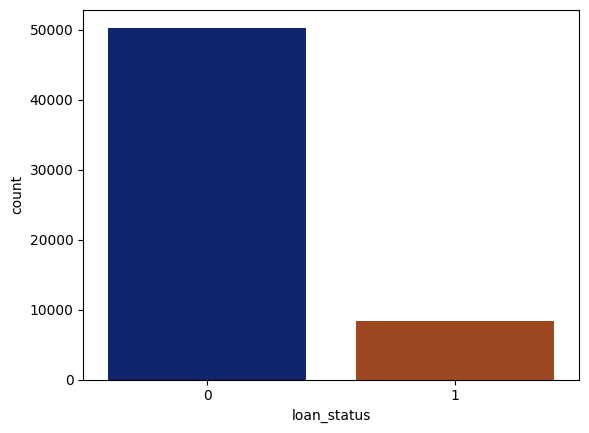

In [9]:
sns.countplot(data=loans, x="loan_status",palette='dark')

In [10]:
X = loans.drop(["id", "loan_status"], axis='columns')
y = loans[["loan_status"]]
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,0,0.0,0,0,6000,11.49,0.17,0,14
1,22,56000,1,6.0,1,1,4000,13.35,0.07,0,2
2,29,28800,1,8.0,2,2,6000,8.90,0.21,0,10
3,30,70000,0,14.0,3,0,12000,11.11,0.17,0,5
4,22,60000,0,2.0,1,2,6000,6.92,0.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,2,5.0,0,3,25000,15.95,0.21,1,10
58641,28,28800,0,0.0,1,1,10000,12.73,0.35,0,8
58642,23,44000,0,7.0,0,3,6800,16.00,0.15,0,2
58643,22,30000,0,2.0,0,2,5000,8.90,0.17,0,3


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
lr = LogisticRegression()
lr.fit(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = lr.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
y_true = y
y_true

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
58640,0
58641,1
58642,1
58643,0


In [14]:
confusion_matrix(y_true, y_pred)

array([[49173,  1122],
       [ 5557,  2793]])

In [15]:
# Assuming y_true and y_pred are your ground truth and predictions
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.drop("support", axis='columns')

,precision,recall,f1-score
0,0.898465,0.977692,0.936406
1,0.713410,0.334491,0.455442
accuracy,0.886111,0.886111,0.886111
macro avg,0.805938,0.656091,0.695924
weighted avg,0.872117,0.886111,0.867925


In [16]:
accuracy_score(y_true, y_pred)*100

88.6111347941001

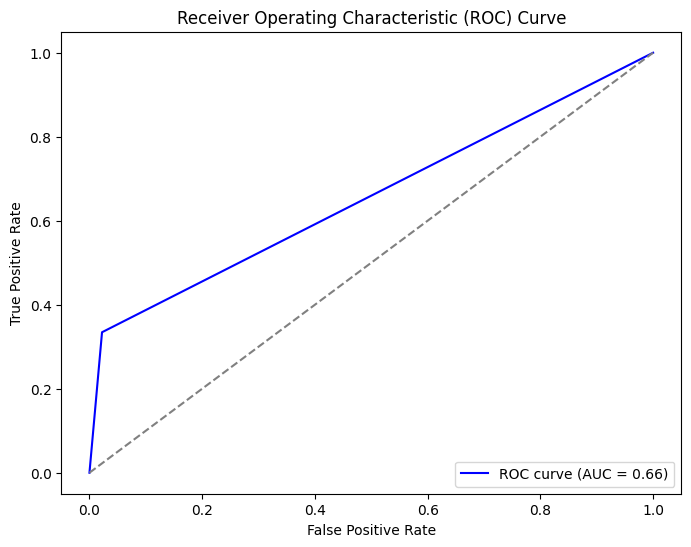

In [17]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Test Set

In [18]:
loan_test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")
loan_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [19]:
for col in loan_test.columns:
    if loan_test[col].dtype in ["object", "category"]:
        loan_test[col], _ = loan_test[col].factorize()

In [20]:
X_test = loan_test
X_test = X_test.drop("id", axis="columns")
X_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,0,3.0,0,0,25000,15.76,0.36,0,2
1,26,96000,1,6.0,1,1,10000,12.68,0.10,1,4
2,26,30000,0,5.0,2,2,4000,17.19,0.13,1,2
3,33,50000,0,4.0,3,3,7000,8.90,0.14,0,7
4,26,102000,1,8.0,0,4,15000,16.32,0.15,1,4
...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,1,2.0,3,5,3000,10.37,0.10,0,4
39094,22,48000,1,6.0,4,3,7000,6.03,0.15,0,3
39095,51,60000,1,0.0,1,3,15000,7.51,0.25,0,25
39096,22,36000,1,4.0,1,4,14000,15.62,0.39,1,4


In [21]:
y_prediction = lr.predict(X_test)
y_prediction

array([1, 0, 0, ..., 0, 1, 1])

In [22]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e10/sample_submission.csv")
submission

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5
...,...,...
39093,97738,0.5
39094,97739,0.5
39095,97740,0.5
39096,97741,0.5


In [23]:
dictionary = {
    "id": loan_test["id"].values,
    "loan_status": y_prediction
}

test_submission = pd.DataFrame(dictionary)

# test_submission.index, type(test_submission), test_submission.columns

In [24]:
test_submission.to_csv("/kaggle/output/submission.csv", index=False)